<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


/Users/emekaudemezue/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ConvertedComp'>

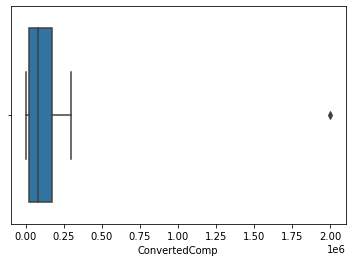

In [3]:
# assigned the ConvertedComp column of dataframe to a variable called 'int_comp' and then converted to integer
int_comp = df['ConvertedComp'].describe()
int_comp2 = int_comp.astype (int)
int_comp2.describe()
sns.boxplot(int_comp2)

### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


/Users/emekaudemezue/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


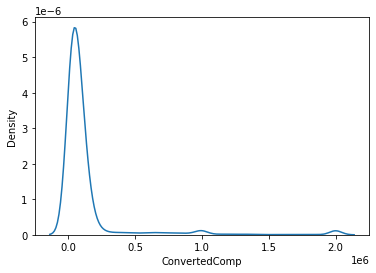

In [4]:
# your code goes here
CCdistcurve = df['ConvertedComp']
# sns.distplot(CCdistcurve)



sns.distplot(df['ConvertedComp'], 'ConvertedComp', hist = False, kde = True)

plt.show()


Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

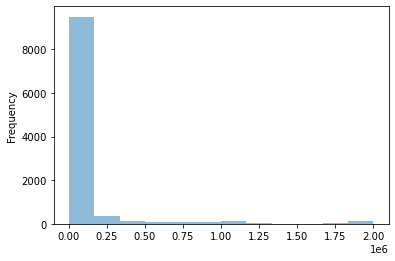

In [5]:
# your code goes here
# sns.histplot(CCdistcurve)
df['ConvertedComp'].plot.hist(bins=12, alpha=0.5)

What is the median of the column `ConvertedComp`?


In [8]:
# your code goes here
CCdistcurve.median()

57745.0

How many responders identified themselves only as a **Man**?


In [9]:
# your code goes here
print(df['Gender'].value_counts())

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [10]:
# your code goes here
woman = df['Gender'].value_counts()['Woman']
print('\nMedian of respondents that identified as "Woman"...\n')

print(np.median(woman))




Median of respondents that identified as "Woman"...

731.0


Give the five number summary for the column `Age`?


In [6]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

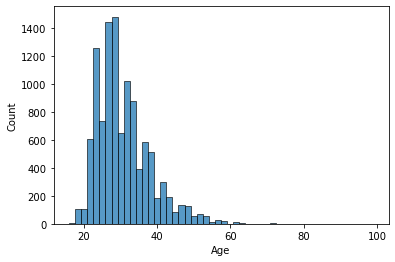

In [11]:
sns.histplot(age,bins=50)

**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [10]:
# your code goes here
from numpy import percentile

age = df['Age']
# calculate quartiles
quartiles = age.quantile(q=[0.25, 0.50, 0.75])

# # calculate min/max
quart_1, quart_3 = quartiles.min(), quartiles.max()
# # print 5-number summary

print('\n The 5 - Number Summary for "Age" is\n')

print('\nMin is \n')
print(age.min())

print('\nMedian is.....\n')
print(age.median())

print ('\nQ1 is.....\n')
print (quart_1)

print('\nQ3 is..... \n')
print(quart_3)

print('\nMax is \n')
print(age.max())


 The 5 - Number Summary for "Age" is


Min is 

16.0

Median is.....

29.0

Q1 is.....

25.0

Q3 is..... 

35.0

Max is 

99.0


Plot a histogram of the column `Age`.


<AxesSubplot:xlabel='Age', ylabel='Count'>

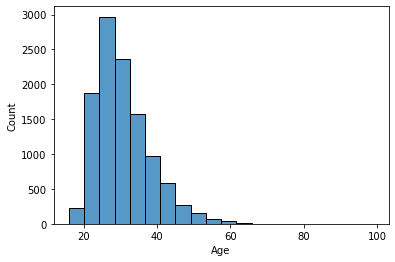

In [7]:
# your code goes here
Agehist = df['Age']
sns.histplot(Agehist,bins=20)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


/Users/emekaudemezue/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ConvertedComp'>

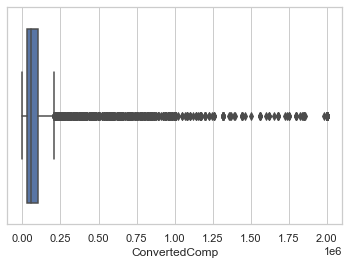

In [14]:
# your code goes here
sns.set_theme(style="whitegrid")
sns.boxplot(CCdistcurve)


# int_comp2.plot(kind='box', figsize=(8, 6))

# plt.title('Box plot of Converted Compensations of Respondents')
# plt.ylabel('Compensations')

# plt.show()



<AxesSubplot:xlabel='Age'>

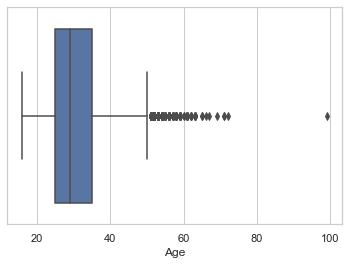

In [29]:
sns.boxplot(df['Age'])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [18]:
# your code goes here
ConvertedComp = df['ConvertedComp']
quartiles2 = ConvertedComp.quantile(q=[0.25, 0.50, 0.75])
print('\nThe range is......\n')
print(quartiles2)
print('\nThe IQR is......\n')
print(iqr)


The range is......

0.25     26868.0
0.50     57745.0
0.75    100000.0
Name: ConvertedComp, dtype: float64

The IQR is......

73132.0


In [22]:
Combination = df[['Age']

57745.0

Find out the upper and lower bounds.


In [17]:
# your code goes here
q1 = ConvertedComp.quantile(0.25)
q3 = ConvertedComp.quantile(0.75)

iqr = q3 - q1

# lower_bound = q1 -(1.5 * iqr) 
# upper_bound = q3 +(1.5 * iqr)

# print('\nThe Upper Bound is......\n')
# print(upper_bound)
# print('\nThe Lower Bound is......\n')
# print(lower_bound)


min_val = df['ConvertedComp'].min()
max_val = df['ConvertedComp'].max()
print('The min/max for ConvertedComp are',min_val, 'and', max_val)

The min/max for ConvertedComp are 0.0 and 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [19]:
# your code goes here
# It's an outlier if it is less than: Q1 - 1.5 * IQR. or if it is greater than: Q3 + 1.5 * IQR
print('Outliers below:',df['ConvertedComp'].lt(q1 - 1.5*iqr).sum())
print('Outliers above:',df['ConvertedComp'].gt(q3 + 1.5*iqr).sum())
print('Outliers below:',df['ConvertedComp'].lt(q1 - 1.5*iqr).sum())
print('Median with outliers:',df['ConvertedComp'].median())
print('Median with outliers removed:',df[df['ConvertedComp'].le(q3 + 1.5*iqr)]['ConvertedComp'].median())
print('Mean with outliers removed:',df[df['ConvertedComp'].le(q3 + 1.5*iqr)]['ConvertedComp'].mean())
    

Outliers below: 0
Outliers above: 879
Outliers below: 0
Median with outliers: 57745.0
Median with outliers removed: 52704.0
Mean with outliers removed: 59883.20838915799


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [20]:
# your code goes here

print(df.shape)
print(df['ConvertedComp'].gt(q3 + 1.5*iqr).shape)
df1 = df[df['ConvertedComp'].le(q3 + 1.5*iqr)]
print('total number in new dataset:',df1.shape[0])
df2 = df[df['ConvertedComp'].gt(q3 + 1.5*iqr)]
print('total number of outliers removed:',df2.shape[0])
df3 = df[df['ConvertedComp'].isnull()]
print('total number of nulls removed:',df3.shape[0])
print('total of outliers + inliers + nulls:', (9703 + 879 + 816))

(11398, 85)
(11398,)
total number in new dataset: 9703
total number of outliers removed: 879
total number of nulls removed: 816
total of outliers + inliers + nulls: 11398


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [21]:
# your code goes here
df.corr()['Age']


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
